In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle 


In [2]:
dados = pd.read_csv("artificial1d.csv")

In [3]:
#PRÉ-PROCESSAMENTO

dados.head(6)

type(dados["-1,00E+18"][5])

#Convertendo string para float

dd =  dados.apply(lambda x: x.str.replace(',', '.').astype(float) if x.dtype == "object" else x)

dd["-1,00E+18"]

dd.shape



(29, 2)

MSE: 2.0787509315083062e+35
Weights: [8.73416099e+17]
Bias: 1.4108275862068962e+17


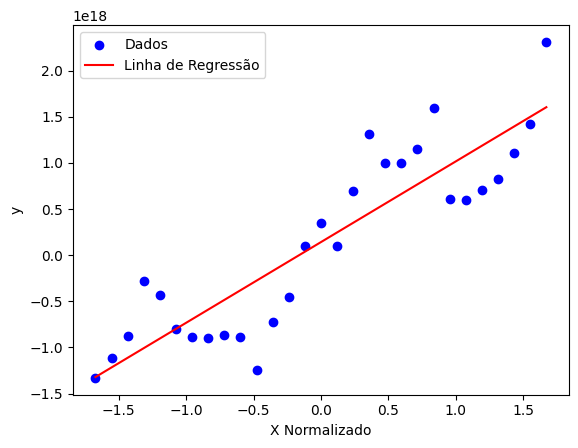

In [4]:
# Simular dados de entrada (X) e saída (y)


X = dd["-1,00E+18"].values.reshape(-1, 1)  # Transforma em array numpy 2D
y = dd["-2,08E+18"].values.reshape(-1, 1)  # Garante que y também seja 2D para alinhamento

#Normalizando os dados de entrada X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X é sua matriz de características


class LinearRegressionGD:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            error = y_predicted - y
            dw = (2 / n_samples) * np.dot(X.T, error)
            db = (2 / n_samples) * np.sum(error)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Criar e treinar o modelo com dados normalizados
model = LinearRegressionGD()
model.fit(X_scaled, y)

# Fazer previsões
predictions = model.predict(X_scaled)

# Calcular o MSE
mse = np.mean((predictions - y) ** 2)

print(f"MSE: {mse}")
print(f"Weights: {model.weights.flatten()}")
print(f"Bias: {model.bias}")

# Plotar os dados e a linha de regressão com matplotlib 
plt.scatter(X_scaled, y, color='blue', label='Dados')
plt.plot(X_scaled, predictions, color='red', label='Linha de Regressão')
plt.xlabel('X Normalizado')
plt.ylabel('y')
plt.legend()
plt.show()


with open('modelo_lr.pkl', 'wb') as file:
    pickle.dump({'weights': model.weights, 'bias': model.bias}, file)



